[View in Colaboratory](https://colab.research.google.com/github/utensil/julia-playground/blob/master/dl/hello_pspnet.ipynb)

The following is adapted from https://gluon-cv.mxnet.io/build/examples_segmentation/demo_psp.html#test-with-pspnet-pre-trained-models

In [1]:
!pip install mxnet

    100% |████████████████████████████████| 23.9MB 1.4MB/s 


In [3]:
!pip install gluoncv

    100% |████████████████████████████████| 143kB 4.6MB/s 
    100% |████████████████████████████████| 51kB 5.8MB/s 


In [0]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [5]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename)

100%|██████████| 52/52 [00:00<00:00, 2169.52KB/s]


'ade20k_example.jpg'

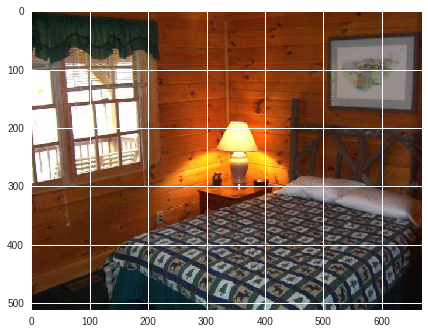

In [6]:
img = image.imread(filename)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [0]:
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])
img = transform_fn(img)
img = img.expand_dims(0).as_in_context(ctx)

In [8]:
model = gluoncv.model_zoo.get_model('psp_resnet50_ade', pretrained=True)

Model file is not found. Downloading.


92684KB [00:03, 29211.68KB/s]                           
/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:413: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


Model file is not found. Downloading.


178237KB [00:05, 31962.49KB/s]                            


In [0]:
output = model.demo(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [0]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

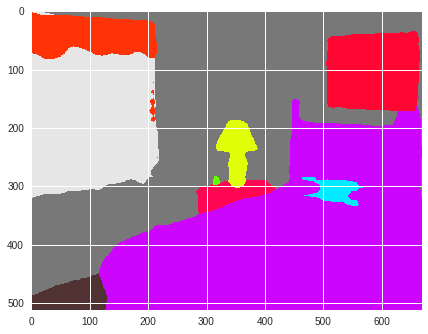

In [11]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

The following is adapted from https://gluon-cv.mxnet.io/build/examples_detection/demo_faster_rcnn.html#sphx-glr-build-examples-detection-demo-faster-rcnn-py